# Basic time series analysis

In this notebook I'll show how to do basic time series analysis using Pandas. I will show how to convert data from "stacked" format, resample data and deal with missing points.

The parking place availibility dataset used for the analysis is taken from the [Wrocław open-data site](http://www.wroclaw.pl/open-data/index.php?option=com_content&view=article&id=124:zapelnienie-parkingow&catid=17&Itemid=165). There are four parking places: _Narodowe Forum Muzyki_, _Parking Hala Stulecia_, _Renoma_ and _ul. Św. Antoniego_. The raw data consists of five columns: `Czas_Rejestracji` - timestamp of the measurement, `Liczba_Wolnych_Miejsc` - number of free spots, `Liczba_Poj_Wjezdzajacych` - number of cars entering the parking lot, `Liczba_Poj_Wyjezdzajacych` - number of cars leaving the parking lot, and `Nazwa` - the name of the parking place.

## Reading the data
Data can be read from the source or from the downloaded file. We set the timestamp to be the index column.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

d = pd.read_csv('http://www.wroclaw.pl/open-data/opendata/its/parkingi/parkingi.csv', encoding='cp1250', sep=';', index_col=0)
print(d.head())

                         Liczba_Wolnych_Miejsc  Liczba_Poj_Wjezdzajacych  \
Czas_Rejestracji                                                           
2017-06-07 00:00:01.597                    103                         0   
2017-06-07 00:00:01.960                    792                         0   
2017-06-07 00:03:52.000                    602                         0   
2017-06-07 00:05:02.023                    792                         0   
2017-06-07 00:05:02.087                    104                         0   

                         Liczba_Poj_Wyjezdzajacych                  Nazwa  
Czas_Rejestracji                                                           
2017-06-07 00:00:01.597                          0     ul. Ĺ›w. Antoniego  
2017-06-07 00:00:01.960                          0  Parking Hala Stulecia  
2017-06-07 00:03:52.000                          0  Narodowe Forum Muzyki  
2017-06-07 00:05:02.023                          0  Parking Hala Stulecia  
2017-06-07 

## Change structure

We can see, that for each place there is a separate timestamp. It would be useful to compare the features of every place. The achieve this we need to reformat our table. Luckily this is only one command in Pandas

In [2]:
d = d.pivot(columns='Nazwa')
print(d.head())

                        Liczba_Wolnych_Miejsc                               \
Nazwa                   Narodowe Forum Muzyki Parking Hala Stulecia Renoma   
Czas_Rejestracji                                                             
2017-06-07 00:00:01.597                   NaN                   NaN    NaN   
2017-06-07 00:00:01.960                   NaN                 792.0    NaN   
2017-06-07 00:03:52.000                 602.0                   NaN    NaN   
2017-06-07 00:05:02.023                   NaN                 792.0    NaN   
2017-06-07 00:05:02.087                   NaN                   NaN    NaN   

                                           Liczba_Poj_Wjezdzajacych  \
Nazwa                   ul. Ĺ›w. Antoniego    Narodowe Forum Muzyki   
Czas_Rejestracji                                                      
2017-06-07 00:00:01.597              103.0                      NaN   
2017-06-07 00:00:01.960                NaN                      NaN   
2017-06-07 00:03:52.

As we can see, the data was reformatted and we have three main columns: `Liczba_Wolnych_Miejsc`, `Liczba_Poj_Wjezdzajacych` and `Liczba_Poj_Wyjezdzajacych` with respect to `Nazwa`. Obviously, we have many `NaN`s, because the data is recored at different time for each place. We can deal with it with resampling.

## Resampling

Let's resample the data with 5 minutes bin size. First, we need to convert the index column type to `datetime` and then we resample the data using `median`.

In [3]:
d.index = pd.to_datetime(d.index)
d = d.resample('5T').median()
print(d.head())

                    Liczba_Wolnych_Miejsc                               \
Nazwa               Narodowe Forum Muzyki Parking Hala Stulecia Renoma   
Czas_Rejestracji                                                         
2017-06-07 00:00:00                 602.0                 792.0    NaN   
2017-06-07 00:05:00                 602.0                 792.0  575.0   
2017-06-07 00:10:00                 602.0                 792.0    NaN   
2017-06-07 00:15:00                 602.0                 792.0  553.0   
2017-06-07 00:20:00                 602.0                 792.0    NaN   

                                       Liczba_Poj_Wjezdzajacych  \
Nazwa               ul. Ĺ›w. Antoniego    Narodowe Forum Muzyki   
Czas_Rejestracji                                                  
2017-06-07 00:00:00              103.0                      0.0   
2017-06-07 00:05:00              104.0                      0.0   
2017-06-07 00:10:00              104.0                      0.0   
2017-

Unfortunately we have still many `NaN`s. It turns out, that the data of `Renoma` parking lot is updated every 10 minutes. We can resample the data, but we can also fill the `NaN`s with values that are before or afer the `NaN`. We will do both, because we have `NaN` in the first and the last row of the data frame.

In [4]:
d = d.fillna(method='bfill')
d = d.fillna(method='ffill')
print(d.head())

                    Liczba_Wolnych_Miejsc                               \
Nazwa               Narodowe Forum Muzyki Parking Hala Stulecia Renoma   
Czas_Rejestracji                                                         
2017-06-07 00:00:00                 602.0                 792.0  575.0   
2017-06-07 00:05:00                 602.0                 792.0  575.0   
2017-06-07 00:10:00                 602.0                 792.0  553.0   
2017-06-07 00:15:00                 602.0                 792.0  553.0   
2017-06-07 00:20:00                 602.0                 792.0  524.0   

                                       Liczba_Poj_Wjezdzajacych  \
Nazwa               ul. Ĺ›w. Antoniego    Narodowe Forum Muzyki   
Czas_Rejestracji                                                  
2017-06-07 00:00:00              103.0                      0.0   
2017-06-07 00:05:00              104.0                      0.0   
2017-06-07 00:10:00              104.0                      0.0   
2017-

## Plotting the data

Now we are ready to plot the data and compare the availability of the parking throughout the day.

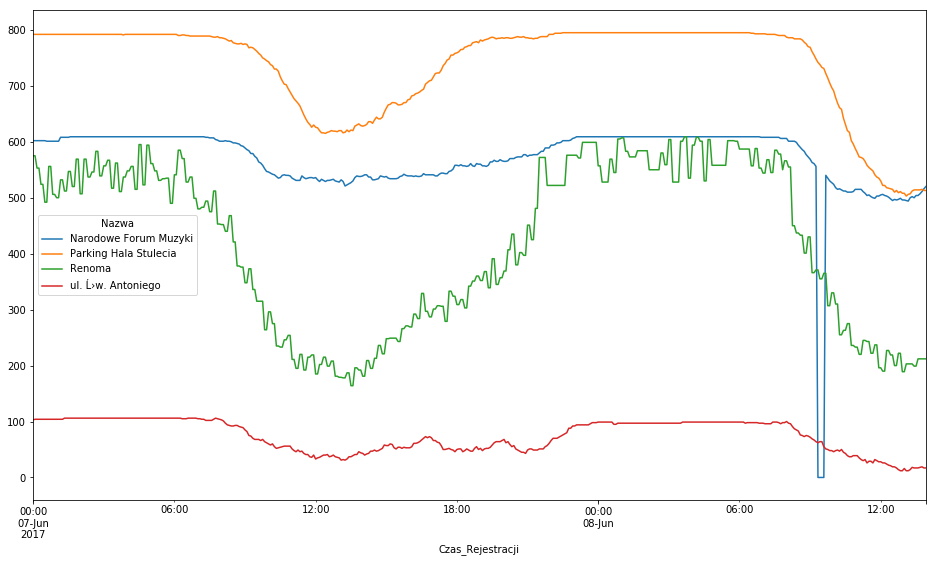

In [5]:
d['Liczba_Wolnych_Miejsc'].plot(figsize=(16, 9));